## Taxi Duration Prediction

#### Problem defination 
Exploratory data analysis for the Taxi trip duration prediction. Making sure that all the data variables are explored and patterns uncovered.

## 1. Exploratory Data Analysis
Let's check the data files! According to the data description we should find the following columns:

 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - (target) duration of the trip in seconds

Here, we have 2 variables dropoff_datetime and store_and_fwd_flag which are not available before the trip starts and hence will not be used as features to the model.

#### Hypothesis Generation
Next, we will have to make some exhaustive hypothesis 
##### Number of passengers
-The more the passenger the more the duration
-if more passanger travel on a weekend the trip is likely to last longer

##### Vendor type
- Vendor 2 have more travel time than vendor one
- which vendor has more distance covered in tthe data set.

##### Time
- The later hours show more traffic
- Is the weekday busier than wekends.
Which month of the year shows the most times. 

##### Duration
- How does the duration increase with respect with distance.

#####  Distance
- The distance is correlates with the direction of the travel
- on average how is the distance affected by vendor type?

## EDA
### Now we Explore the data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#importing data
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
#data head
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#data head
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [5]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(729322, 11)

In [6]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
#check for missing variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [8]:
# Identifying variables with object datatype
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [9]:
# Identifying variables with object datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

#### Summary
The pickupdate and time should be datetime \
the dropoff date time should be also datetime\
the vendor_id is identity variable it is ok at integer\
the passenger count is the number of passanger in the car it should integer\
the trip duration in seconds can be integer\
the  store_and_fwd_flag should be removed\
then convert the vendor_id to a categorical variable

In [10]:
# converting "dependents" and "city" to their respective types
data[['pickup_datetime','dropoff_datetime']] = data[['pickup_datetime','dropoff_datetime']].apply(lambda _: pd.to_datetime(_,format='%Y-%m-%d %H:%M:%S.%f', errors='coerce'))
# typecasting "vendor","store fwd flag" " to category type
data['vendor_id'] = data['vendor_id'].astype('category')
# checking
data[['pickup_datetime','dropoff_datetime']].dtypes

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object

#### Next step
Create the new column and verify the trip duratrion.

In [11]:
data['duration'] = data.apply(lambda x: (x['dropoff_datetime'] - x['pickup_datetime']).seconds, axis=1)

In [12]:
#check if the two varables are similar if so then drop one
data[['duration','trip_duration']][:]

,duration,trip_duration
0,400,400
1,1100,1100
2,1635,1635
3,1141,1141
4,848,848
...,...,...
729317,296,296
729318,315,315
729319,673,673
729320,447,447


#### Check if it is the same

In [13]:
#dropp of the columns drop off datetime and store_and_fwd_flag
data = data.drop(columns= ['store_and_fwd_flag', 'dropoff_datetime'])

##### Create more features form pick_up datetime

In [14]:
new_df = pd.DataFrame({"pickup_year":      data['pickup_datetime'].dt.year,
                       "pickup_month":     data['pickup_datetime'].dt.week,
                       "pickup_day":       data['pickup_datetime'].dt.day,
                       "pickup_dayofyear": data['pickup_datetime'].dt.dayofyear,
                       "pickup_dayofweek": data['pickup_datetime'].dt.day_name(),
                       "pickup_quarter":    data['pickup_datetime'].dt.quarter,
                       "pickup_hour":      data['pickup_datetime'].dt.hour,
                       "pickup_minute":    data['pickup_datetime'].dt.minute
                      })
new_df.head()
                       

,pickup_year,pickup_month,pickup_day,pickup_dayofyear,pickup_dayofweek,pickup_quarter,pickup_hour,pickup_minute
0,2016,9,29,60,Monday,1,16,40
1,2016,10,11,71,Friday,1,23,35
2,2016,7,21,52,Sunday,1,17,59
3,2016,1,5,5,Tuesday,1,9,44
4,2016,7,17,48,Wednesday,1,6,42


In [15]:
#concatenate the newly formed data set
combined_data = pd.concat([data,new_df], axis=1)
combined_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,duration,pickup_year,pickup_month,pickup_day,pickup_dayofyear,pickup_dayofweek,pickup_quarter,pickup_hour,pickup_minute
0,id1080784,2,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400,400,2016,9,29,60,Monday,1,16,40
1,id0889885,1,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100,1100,2016,10,11,71,Friday,1,23,35
2,id0857912,2,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635,1635,2016,7,21,52,Sunday,1,17,59
3,id3744273,2,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141,1141,2016,1,5,5,Tuesday,1,9,44
4,id0232939,1,2016-02-17 06:42:23,1,-74.017120,40.708469,-73.988182,40.740631,848,848,2016,7,17,48,Wednesday,1,6,42


In [16]:
#drop the time data set
combined_data = combined_data.drop(columns=['pickup_datetime','trip_duration']) 

#### Get the distance travelled and the direction of the travel

In [17]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def direction_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


combined_data['distance'] = haversine_array(combined_data['pickup_latitude'].values, 
                                                     combined_data['pickup_longitude'].values, 
                                                     combined_data['dropoff_latitude'].values, 
                                                     combined_data['dropoff_longitude'].values)


combined_data['direction'] = direction_array(combined_data['pickup_latitude'].values, 
                                          combined_data['pickup_longitude'].values, 
                                          combined_data['dropoff_latitude'].values, 
                                          combined_data['dropoff_longitude'].values)

## Univariate analysis Numerical Variables

In [18]:
combined_data['pickup_dayofweek'] = combined_data['pickup_dayofweek'].astype('category')
combined_data['id'] = combined_data['id'].astype('category')

In [19]:
combined_data.select_dtypes(include=['int64','float64']).dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
duration               int64
pickup_year            int64
pickup_month           int64
pickup_day             int64
pickup_dayofyear       int64
pickup_quarter         int64
pickup_hour            int64
pickup_minute          int64
distance             float64
direction            float64
dtype: object

In [20]:
# seggregating variables into groups
people = ['passenger_count','duration']
route  = ['direction', 'distance']
time_hr_min  = ['pickup_minute','pickup_hour']
time_period  = ['pickup_year','pickup_month', 'pickup_quarter']

In [21]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

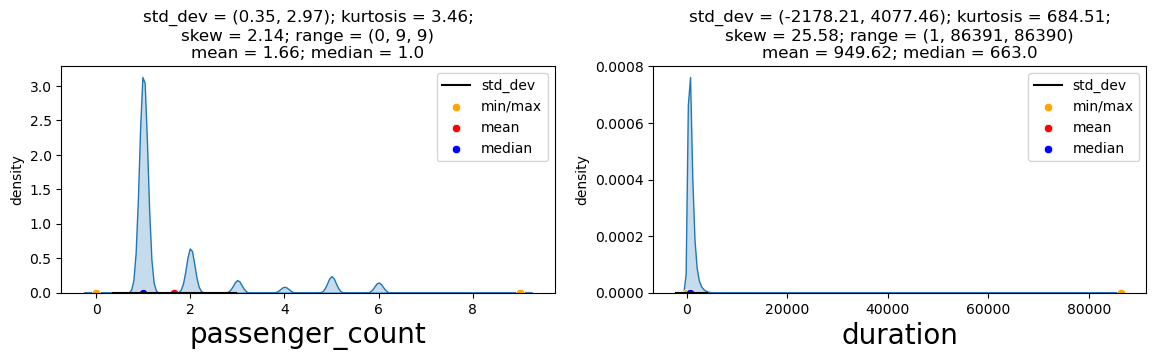

In [23]:
#Univariate analysis using the function on the people group
UVA_numeric(combined_data, people)

### summary 
* Passanger count:
     * **Mean** The plot shows that on average 1.66 perssangers on each ride.\
     * **range** The range of data is from 0-10 passengers\
     * **Skew** the passenger count is possitively skewed there is few outliers present. \
 
*   duration:
     * **Mean** The average time duration is 946 sec
     * **range**  the range is between 1 sec to 86391 sec \
     * **Skew** +25.58 shows it is possitively biased data\
     Also the kurtosis justifies the presence of extreem numberes in the data 




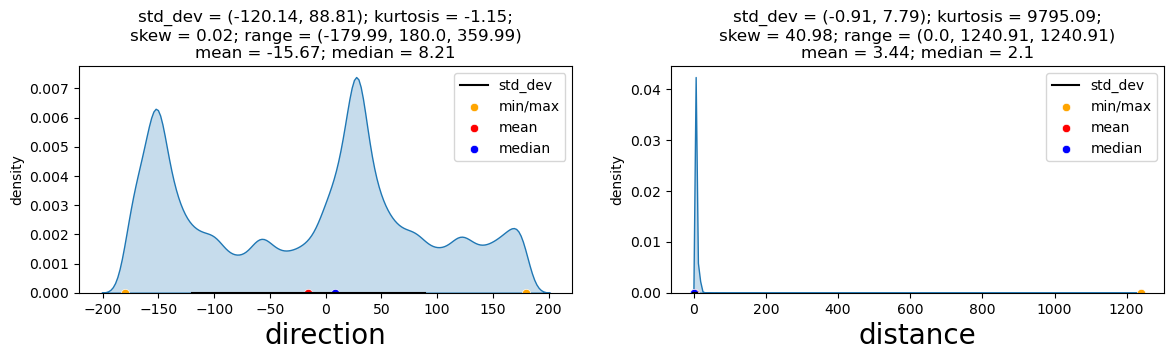

In [24]:
#Univariate analysis using the function on the route group
UVA_numeric(combined_data, route)

#### Summary of the info on people

* **Direction**:
    * The two high spots shows that direction each way of the taxi trips\
    * The direction in degrees shows double peak -150° and 20°. 
* **Kurtosis** 

    * There is almost as much trips on either side of the traffic. 

*  **Distance**:
    * The +40.98 value for **skew** shows it is possitively skewed data.\
    * **Kurtosis 9795** shows there is presence of extreem numbers and outliers
    * The data contains alot of outliers as seen the max diatance is 1240m

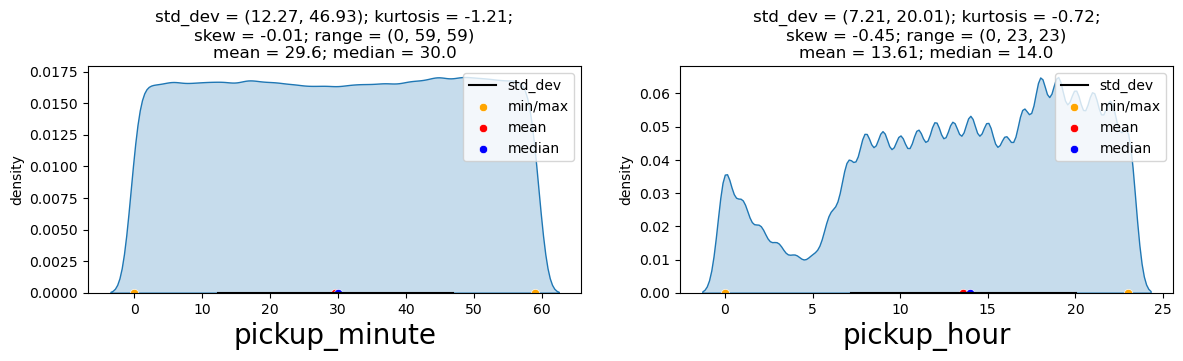

In [25]:
#Univariate analysis using the function on the time in hr and min group
UVA_numeric(combined_data, time_hr_min)

#### Summary
* **Minute**:
    * the **Mean** minute is 29.6s
    * The minute chart shows that the minute of which the information uniform 
* **Hour** 
    * The busiest hr is from 17:00hrs \
    * The **Mean** time is 1:40pm (13.6hrs)
    * it getes busy then the rest of the day. ut continue to decline slowly timm 24:00hrs 
    * The lowest **traffic** is experienced at 5:00hrs\
    * At 6:00hrs the demand step up again rising through to 8:00hrs and levels out\
    * The **kurtosis** value of -0.72 means there is litle or no outlier present in the data. 



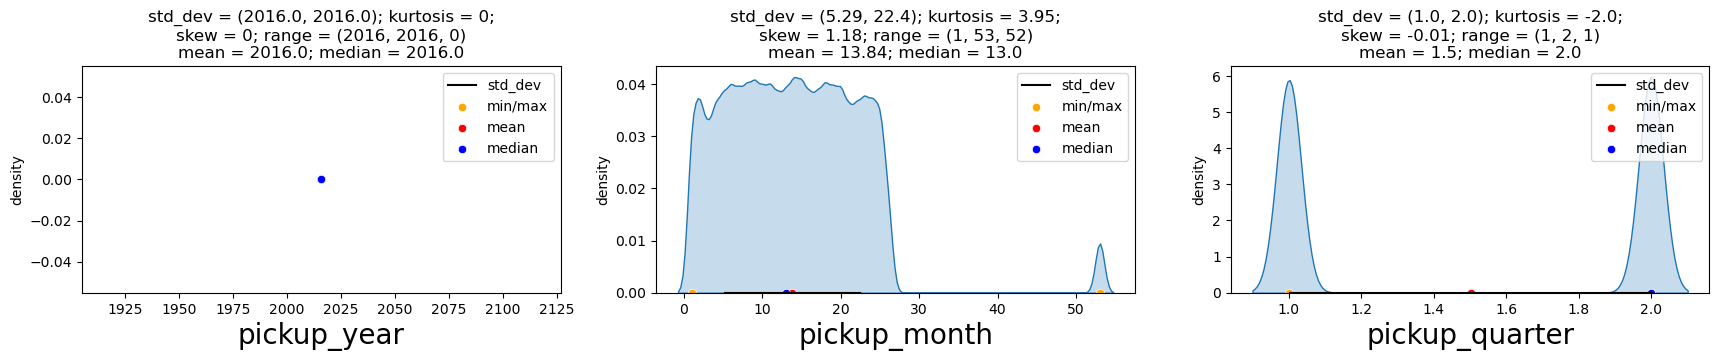

In [26]:
#Univariate analysis using the function on the time by period 
UVA_numeric(combined_data, time_period)

#### Summary
* **Year**:
    * Very interesting data value here as the data represent mostly the data from on year. 
    * The **skew** is 0 there isn't any outlierdue to there is not enough data point.

* **Month**
    * the ** Mean** month is 13.8 
    * The mothly distribution is quite interesting also ther seems to be two group of month.
    * First is between 0 ans 27 abd 50 to 53
    * The 1st to 27th month and the 50th montn

* why was there a data gap?
* **Quarter**
    * There is mostly data from quater one and two
    * The **Mean** is 1.5 quater
    * The **range** of the data is just two quaters 
    * Then though the dta sgows a 24 month period most of the data is from the first and the second quarter.
    * This represents a pattern. 


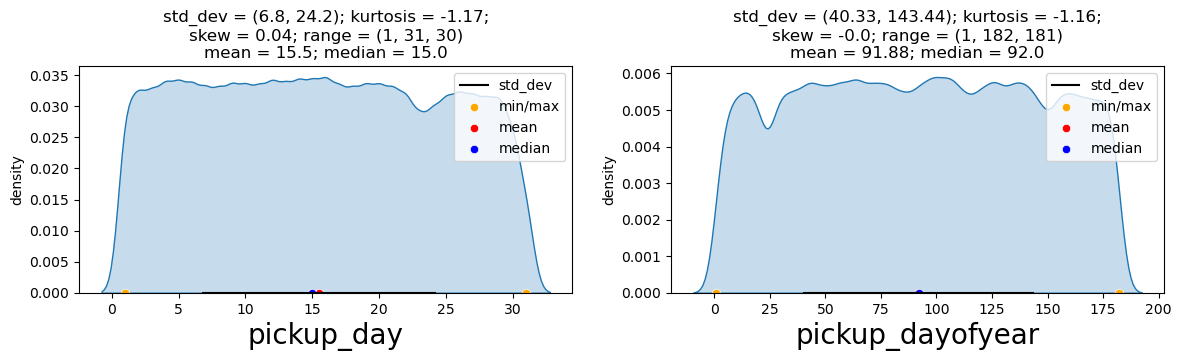

In [27]:
#Univariate analysis using the function on the time by days group
UVA_numeric(combined_data, time_days)

#### Summary
* **Day of week**:
    * The data shows the taxi ride peaks at thursday \
    * There is demand all through the week, monday to saturday.\
    * Sunday shows little or no data\
* **Year**
    * almost a smooth curve for the day of year\
Ofcourse there are some days demand slowed like the 25th and 150day\
A quick verification show that Jan 25th and May 27th are a holidays in the USA.


## Univariate Analysis : Categorical Varibales

In [28]:
combined_data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

id                  category
vendor_id           category
pickup_dayofweek    category
dtype: object

In [29]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

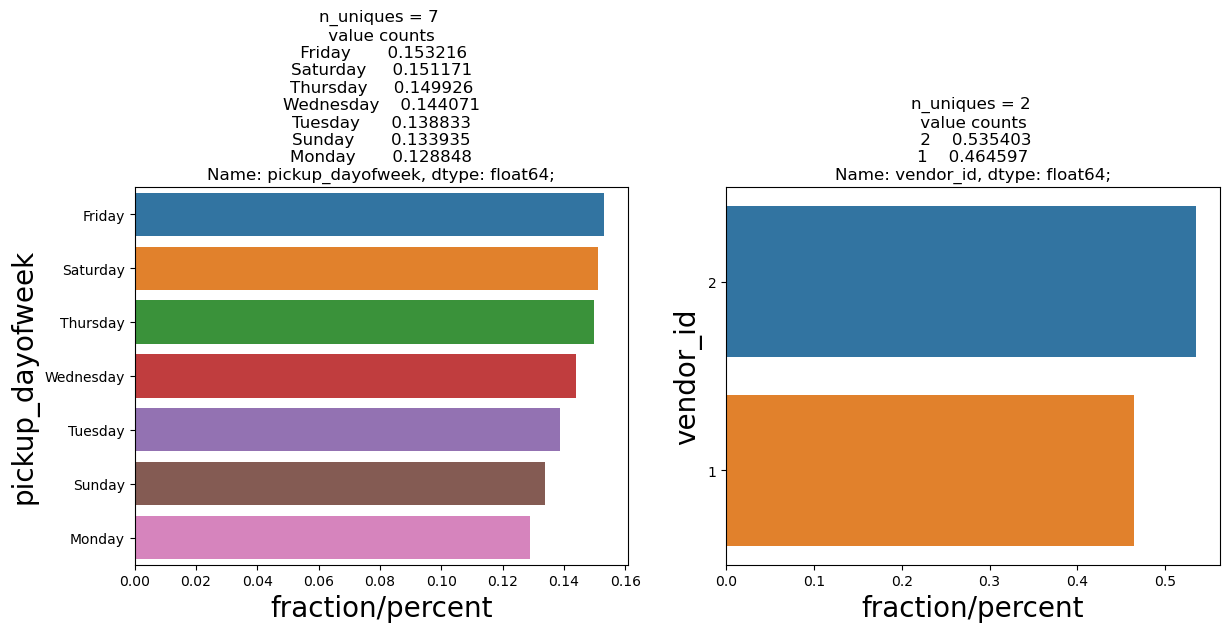

In [30]:
# Custom function for easy visualisation of Categorical Variables
UVA_category(combined_data, ['pickup_dayofweek','vendor_id'])

#### Summary
* **Day of week**:
    * Friday seems to be the peak traffic day.
    * The dates show that from thursday, friday and saturday traffic is high.
    * There is demand all through the week, monday to saturday.
    * Sunday has no data
* **Vendors**:
    * The unique counts shows that Vendor 2 has more bookings than vendor 1

 

### Univariate: Missing Values Numerical

In [31]:
combined_data.isnull().sum()

id                   0
vendor_id            0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
duration             0
pickup_year          0
pickup_month         0
pickup_day           0
pickup_dayofyear     0
pickup_dayofweek     0
pickup_quarter       0
pickup_hour          0
pickup_minute        0
distance             0
direction            0
dtype: int64

#### Summary
The data is totally free from missing values 
It saves alot of time for more hypothesis 

In [32]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True


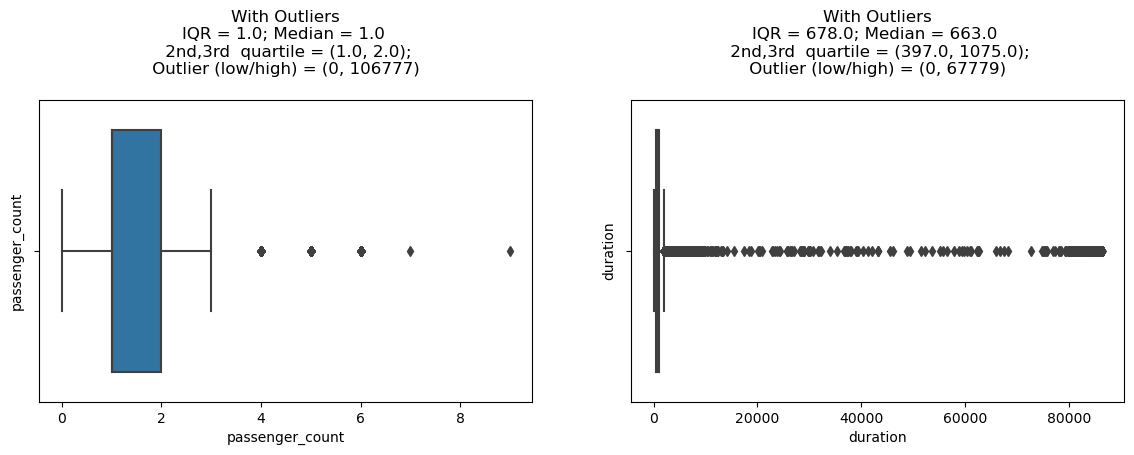

In [33]:
#Drawing boxplot for the people variables showing duration and pasanger count with outliers
UVA_outlier(data, people)

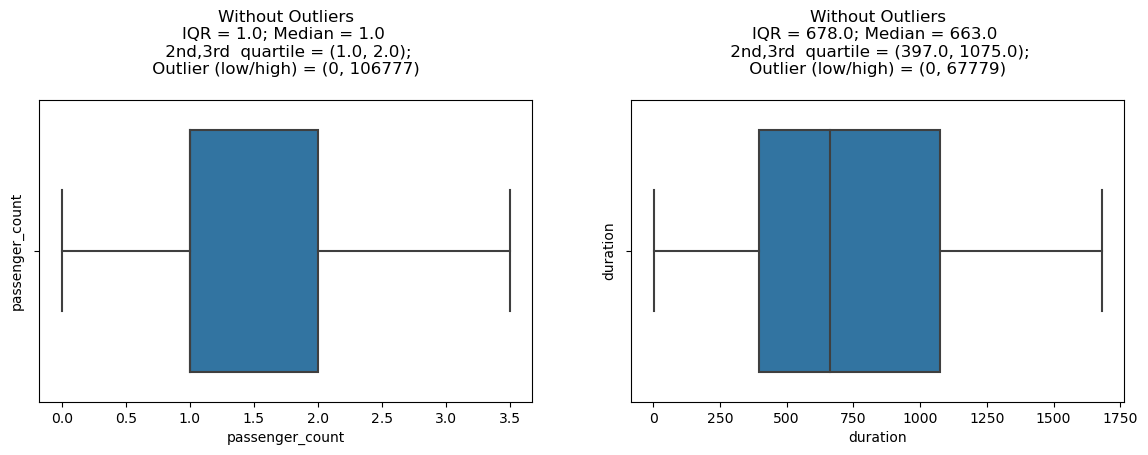

In [34]:
#Drawing boxplot for the people variables showing duration and pasanger count without outliers
UVA_outlier(data, people, include_outlier = False)

### Summary 
The outliers removed the values mean and mode are shown above\
the values now fall inbetween the interquatile range can be 

True
True


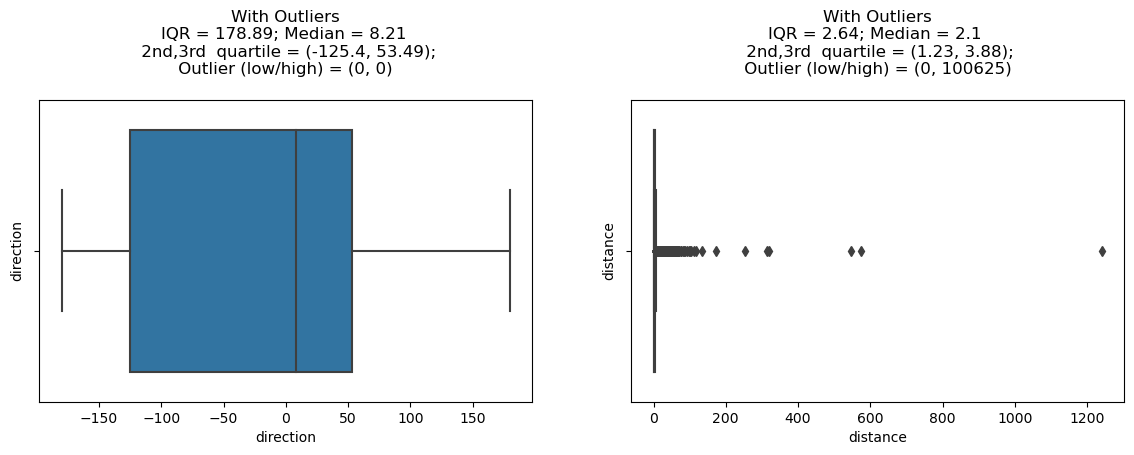

In [35]:
#Drawing boxplot for the route showing distance and direction with outlier
UVA_outlier(combined_data, route)

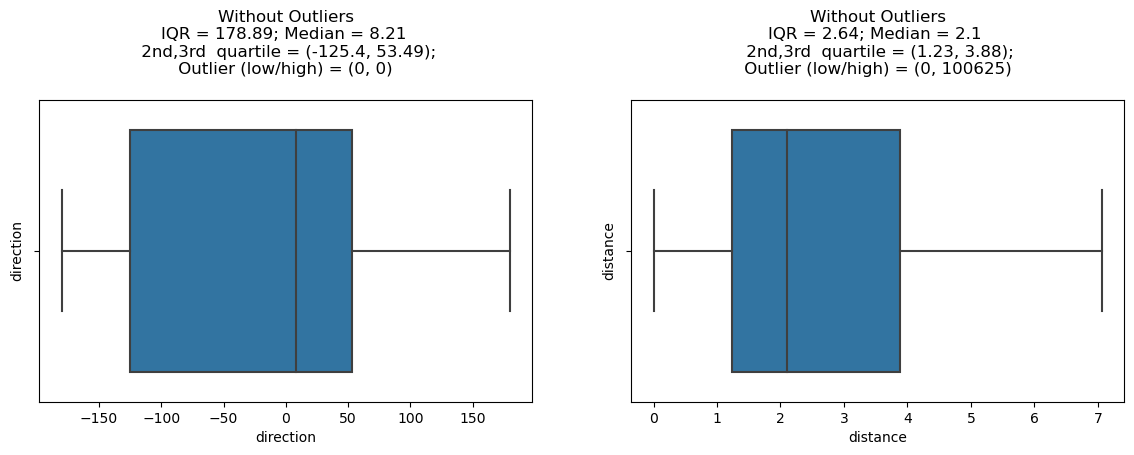

In [36]:
#Drawing boxplot for the route showing distance and direction without outlier
UVA_outlier(combined_data, route, include_outlier = False)

### Summary 
- Direction\
The direction arew mostly -125° and 53° there isnt any outlier 
- Distance \
The distance covered has alot of outliers\
the max distance coverd was over 1200km

True
True


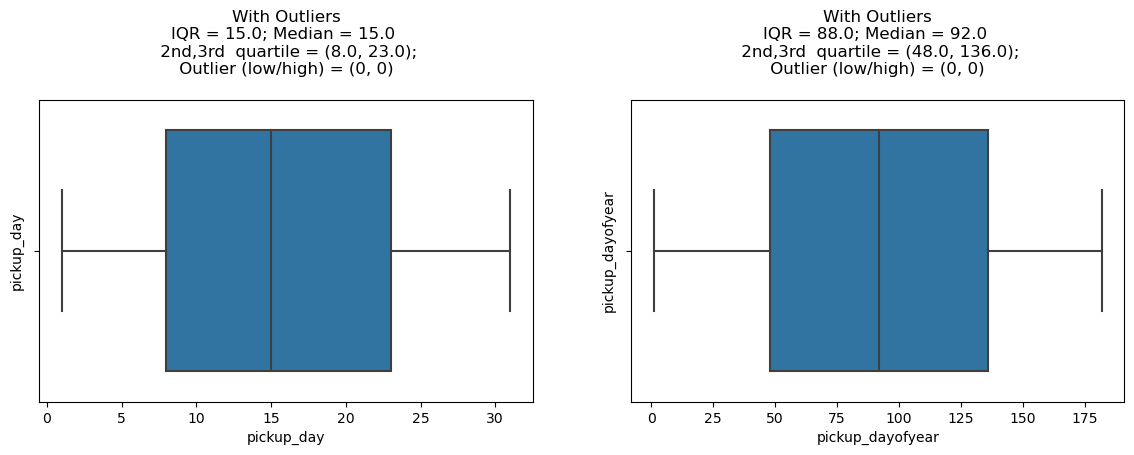

In [37]:
#Drawing boxplot for the time in days variables 
UVA_outlier(combined_data, time_days)

True
True
True


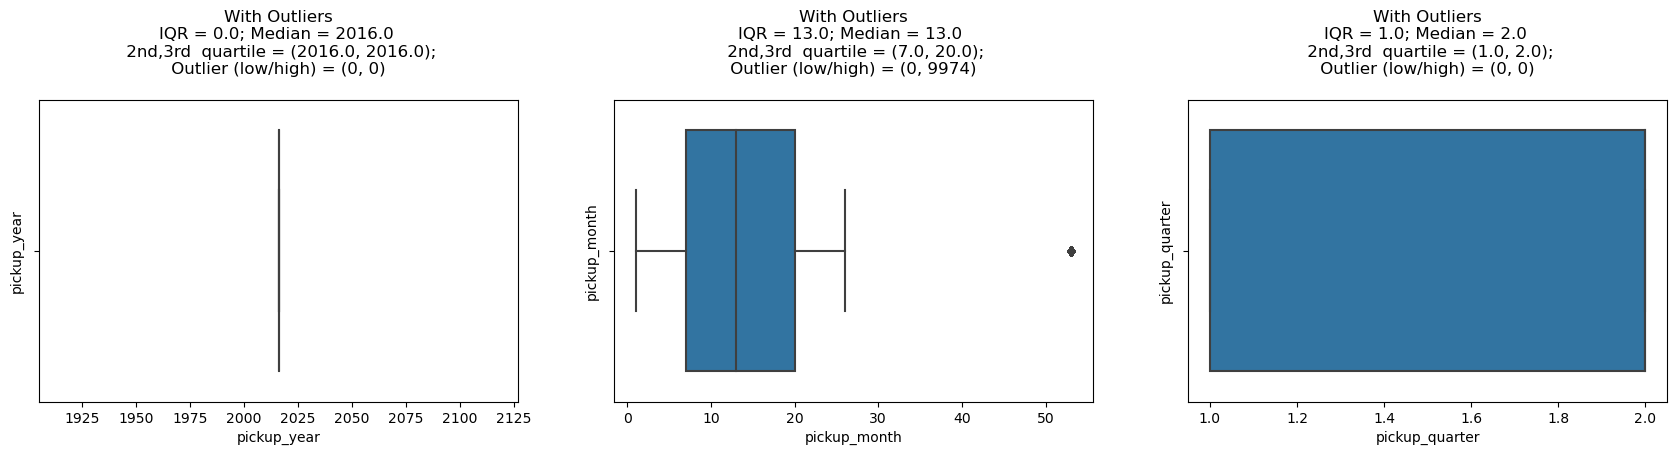

In [38]:
#Drawing boxplot for the time_period in year, month and quater with outlier
UVA_outlier(combined_data, time_period)

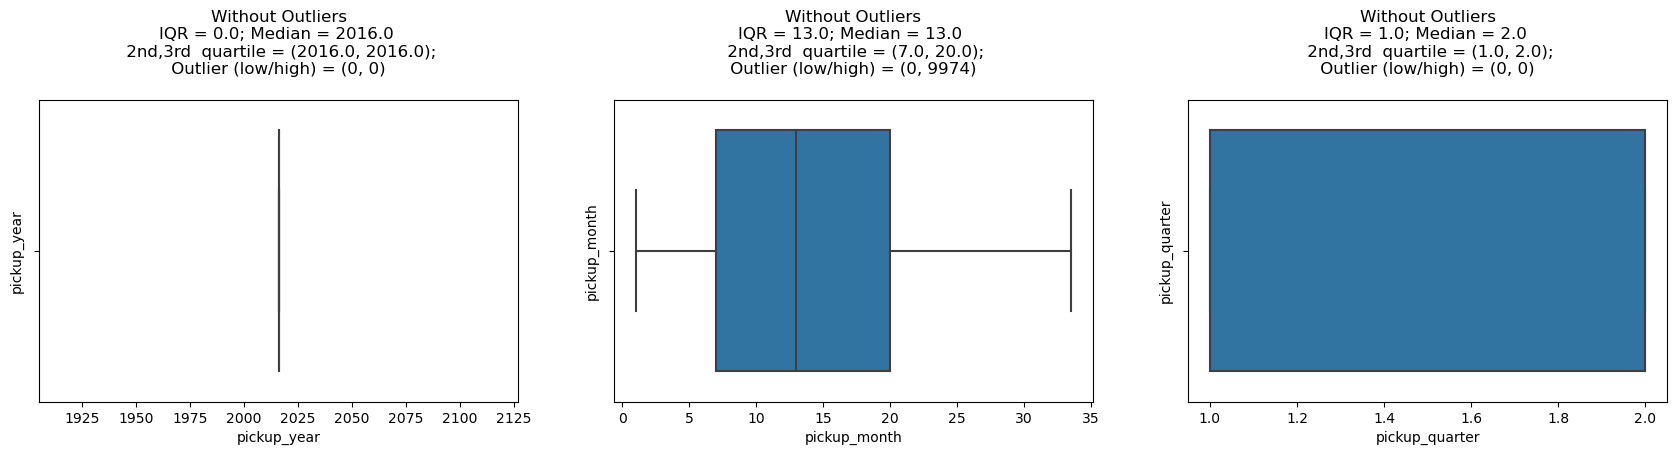

In [39]:
#Drawing boxplot for the time_period in year, month and quater without outlier
UVA_outlier(combined_data, time_period, include_outlier=False)

### Summary
There is and outlier in the pick up month.

True
True


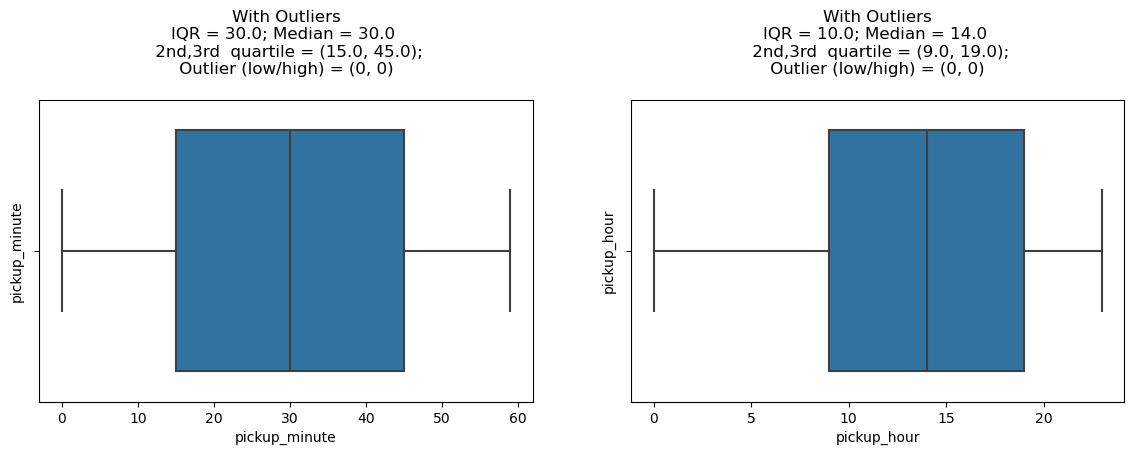

In [40]:
#Drawing boxplot for the time in hour, minute with outlier
UVA_outlier(combined_data, time_hr_min)

### Summary

## Bivariate Analysis : Numerical-Numerical

In [41]:
# isolating numerical datatypes
numerical = combined_data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
duration               int64
pickup_year            int64
pickup_month           int64
pickup_day             int64
pickup_dayofyear       int64
pickup_quarter         int64
pickup_hour            int64
pickup_minute          int64
distance             float64
direction            float64
dtype: object

### Correlation Matrix

In [42]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,duration,pickup_year,pickup_month,pickup_day,pickup_dayofyear,pickup_quarter,pickup_hour,pickup_minute,distance,direction
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.016510,NaN,0.005154,0.001737,-0.001182,0.000337,0.009851,-0.000213,0.009175,0.000497
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.041601,NaN,0.006579,-0.001378,0.003737,0.004155,0.010754,-0.003699,0.251482,-0.118218
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.044490,NaN,-0.004786,-0.006367,-0.001244,-0.000392,0.011433,0.002841,-0.128455,-0.114586
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.025333,NaN,0.005541,-0.000294,0.003762,0.003538,-0.022014,-0.003606,0.132353,0.175405
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.035438,NaN,-0.002402,-0.006082,-0.001627,0.000093,0.014257,0.002800,-0.153760,0.052084
duration,0.016510,0.041601,-0.044490,0.025333,-0.035438,1.000000,NaN,0.011020,0.002240,0.013040,0.012424,0.005452,-0.004537,0.152200,0.002781
pickup_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_month,0.005154,0.006579,-0.004786,0.005541,-0.002402,0.011020,NaN,1.000000,0.000254,0.713257,0.656614,-0.016984,-0.001220,0.021710,-0.001816
pickup_day,0.001737,-0.001378,-0.006367,-0.000294,-0.006082,0.002240,NaN,0.000254,1.000000,0.153732,-0.014326,-0.001699,-0.001369,0.005136,-0.000924
pickup_dayofyear,-0.001182,0.003737,-0.001244,0.003762,-0.001627,0.013040,NaN,0.713257,0.153732,1.000000,0.862306,-0.003549,-0.000564,0.017201,-0.001640


In [43]:
### Heatmap

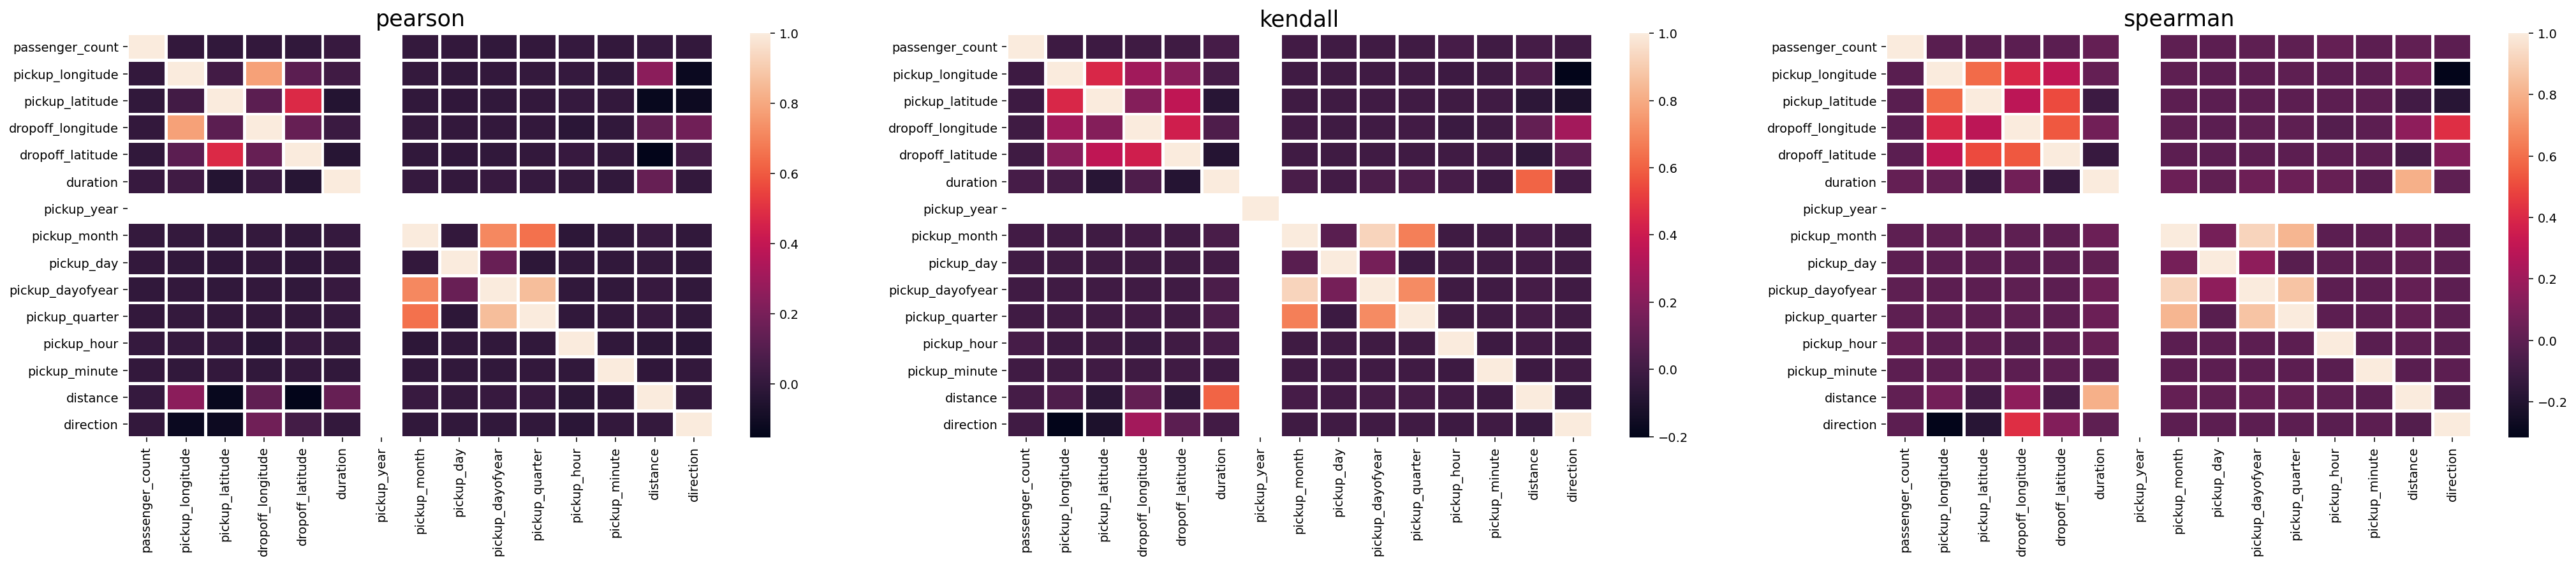

In [44]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



- Kendall,pearson and spearman shows a close corollation similarities expecially in pattern.
- Too many variable with insignificant correlation many correlation lies in the day of montha nd time segment

In [45]:
# extracting transaction information of current and previous months
var = []
var.extend(time_hr_min)
var.extend(time_days)
var.extend(time_period)

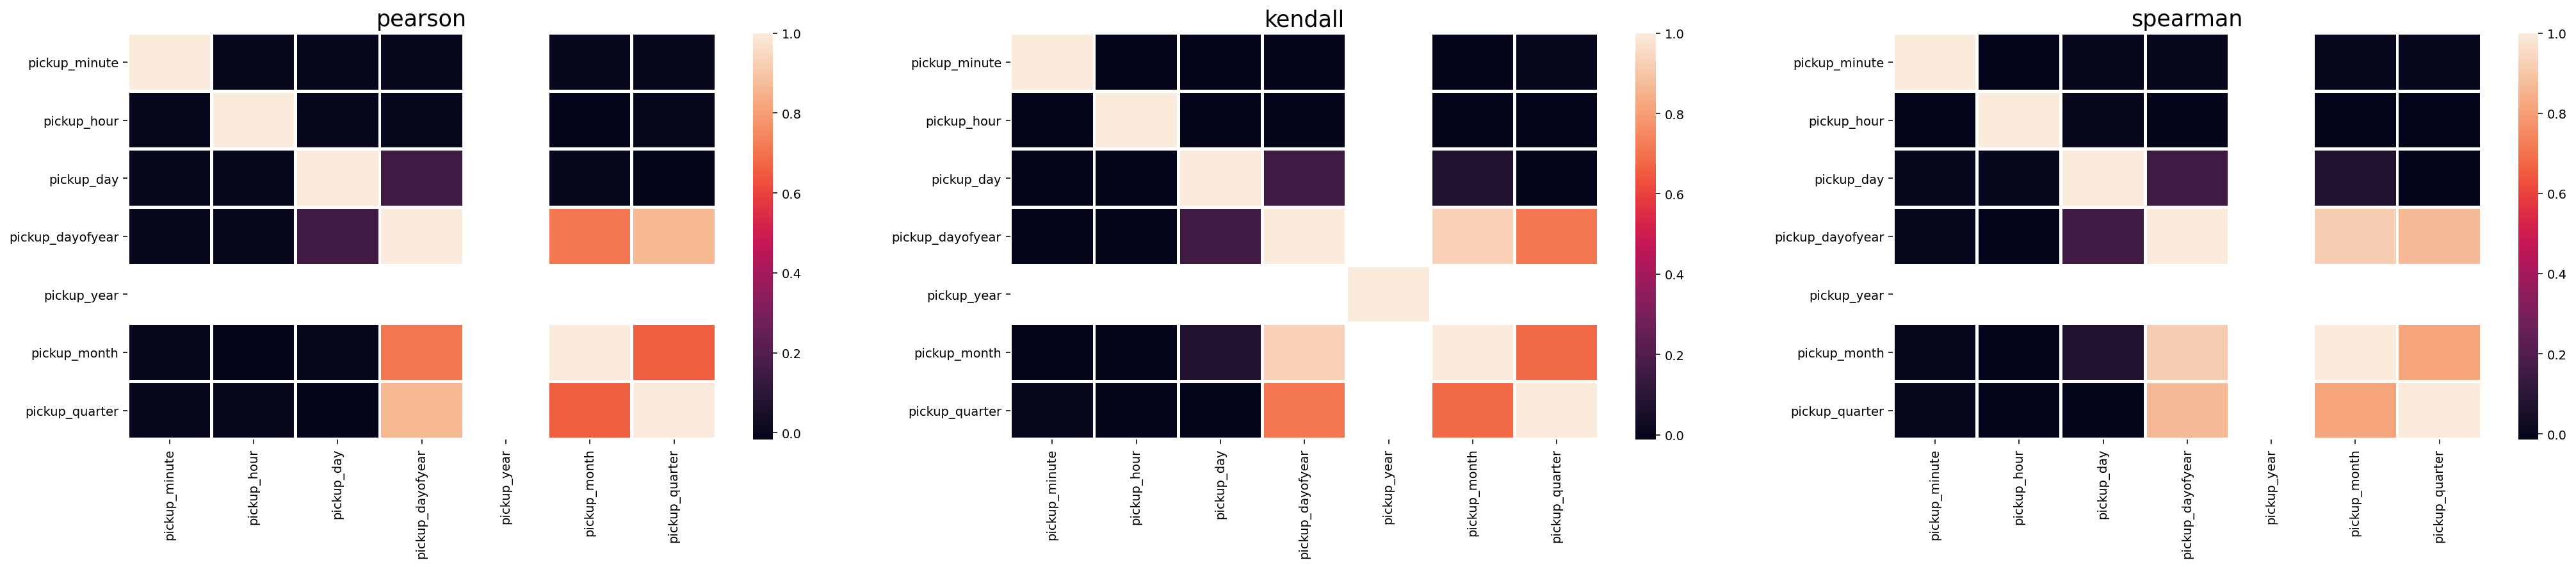

In [46]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

- pickup month andquater show correlation between each other 
- same as pickup quater and year

## Scatter Plot

In [47]:
# Grouping variables
route  = ['direction', 'distance','passenger_count','duration']
time1  = ['pickup_minute','pickup_hour','pickup_day','pickup_year','pickup_month', 'pickup_quarter','pickup_dayofweek','pickup_dayofyear']



<Figure size 840x560 with 0 Axes>

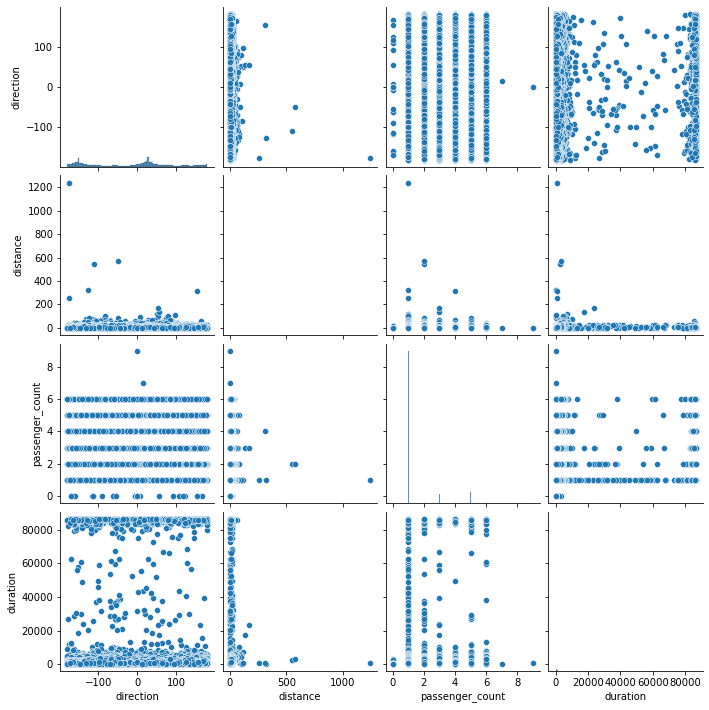

In [48]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[route])

- This scatter plot isnt Meangingful as the data does not show lot of correlation

<Figure size 840x560 with 0 Axes>

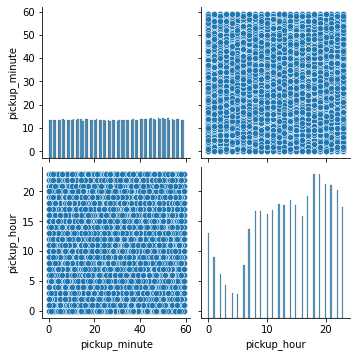

In [49]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[time_hr_min])

- As seen this shown a possitive correlation between the dayof year and the pickup_month

<Figure size 840x560 with 0 Axes>

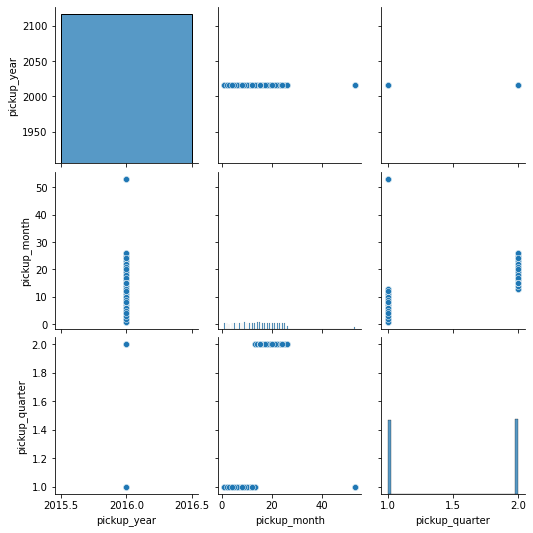

In [50]:
plt.figure(dpi=140)
sns.pairplot(numerical[time_period])

- This dosen't show meaning, as data does not show any correlation

<Figure size 840x560 with 0 Axes>

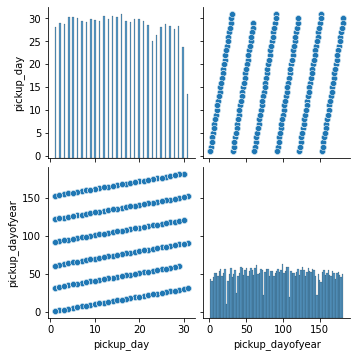

In [51]:
plt.figure(dpi=140)
sns.pairplot(numerical[time_days])

### Summary 
the pickup day and pick up year show correlation
This can be due to the fact that they represent days in time varaible

## Bivariate : Categorical-Categorical

Finally a quick look at the Categorical -Categorical Bivariate analysis\
Although we have only two values a quick evaluation is applied
- Hypothesis
Does the Vendor id relates to the stor flag

In [52]:
# isolating categorical datatypes
categorical = combined_data.select_dtypes(exclude=['int64','float64','Int64'])[:]
categorical.dtypes

id                  category
vendor_id           category
pickup_dayofweek    category
dtype: object

In [53]:
def BVA_categorical_plot(data, cat1, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,cat1]][:]

  #forming a crosstab
  table = pd.crosstab(data[cat1],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=cat1, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[cat1].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

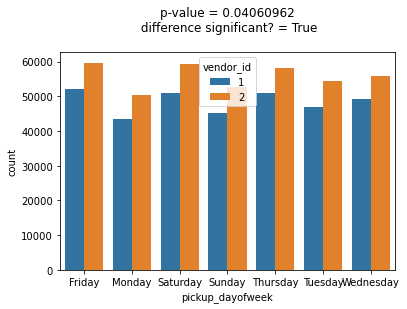

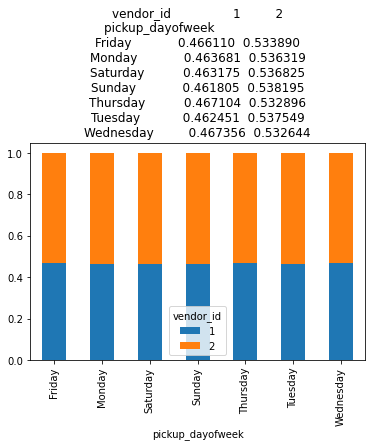

In [54]:
BVA_categorical_plot(combined_data, 'vendor_id','pickup_dayofweek')

####  Findings
- There is a significant difference between the both. The Y-sign is id monotonous compared to N-sign
- It is interesting finding that the Vendor 2 leads vendor on in all the days on average 53% to 47%



### Thank you very much for teaching me this course
You are really a nice teacher
I love Analytics Vhidya